In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import streamlit as st


In [37]:
# Storing the address in 'url' variable
url = "https://epistat.sciensano.be/Data/COVID19BE_CASES_AGESEX.csv"
# Importing the file from the address contained in 'url' into 'df' 
df = pd.read_csv(url)

In [38]:
df.head()

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
0,2020-03-01,Antwerpen,Flanders,40-49,M,1
1,2020-03-01,Brussels,Brussels,10-19,F,1
2,2020-03-01,Brussels,Brussels,10-19,M,1
3,2020-03-01,Brussels,Brussels,20-29,M,1
4,2020-03-01,Brussels,Brussels,30-39,F,1


In [39]:
df = df.drop(columns=['REGION','SEX','AGEGROUP'])

In [40]:
print(df)

             DATE        PROVINCE  CASES
0      2020-03-01       Antwerpen      1
1      2020-03-01        Brussels      1
2      2020-03-01        Brussels      1
3      2020-03-01        Brussels      1
4      2020-03-01        Brussels      1
...           ...             ...    ...
54409         NaN   VlaamsBrabant      3
54410         NaN   VlaamsBrabant      1
54411         NaN  WestVlaanderen      1
54412         NaN  WestVlaanderen      3
54413         NaN             NaN      1

[54414 rows x 3 columns]


In [41]:
df = df.groupby(['PROVINCE','DATE'])[['CASES']].sum().reset_index()


In [42]:
df

,PROVINCE,DATE,CASES
0,Antwerpen,2020-03-01,1
1,Antwerpen,2020-03-02,1
2,Antwerpen,2020-03-03,5
3,Antwerpen,2020-03-04,6
4,Antwerpen,2020-03-05,11
...,...,...,...
3566,WestVlaanderen,2021-01-20,350
3567,WestVlaanderen,2021-01-21,325
3568,WestVlaanderen,2021-01-22,308
3569,WestVlaanderen,2021-01-23,173


In [43]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['year']= df['DATE'].dt.year
df['month']= df['DATE'].dt.month


In [44]:
# dictionary of month number and month name
month = {	1.0:'Janauary',
		2.0:'February',
		3.0:'March',
		4.0:'April',
		5.0:'May',
		6.0:'June',
		7.0:'July',
		8.0:'August',
		9.0:'September',
		10.0:'October',
		11.0:'November',
		12.0:'December'		}

# replace month number by month name
df['month']= df['month'].map(month) 

In [45]:
df.head()

,PROVINCE,DATE,CASES,year,month
0,Antwerpen,2020-03-01,1,2020,March
1,Antwerpen,2020-03-02,1,2020,March
2,Antwerpen,2020-03-03,5,2020,March
3,Antwerpen,2020-03-04,6,2020,March
4,Antwerpen,2020-03-05,11,2020,March


In [46]:
df['MONTH YEAR'] = df['month'].astype(str) + " " + df['year'].astype(str)

In [47]:
df = df.drop(columns = ['DATE','year', 'month'])
df.to_csv('covid.csv')

In [48]:
df = df.groupby(['PROVINCE','MONTH YEAR'])[['CASES']].sum().reset_index()

In [49]:
df.to_csv('out_csv.csv', index = False)

In [50]:
month = df['MONTH YEAR'].unique().tolist()
month

['April 2020',
 'August 2020',
 'December 2020',
 'Janauary 2021',
 'July 2020',
 'June 2020',
 'March 2020',
 'May 2020',
 'November 2020',
 'October 2020',
 'September 2020']

In [51]:
province = df['PROVINCE'].unique().tolist()
province

['Antwerpen',
 'BrabantWallon',
 'Brussels',
 'Hainaut',
 'Limburg',
 'Liège',
 'Luxembourg',
 'Namur',
 'OostVlaanderen',
 'VlaamsBrabant',
 'WestVlaanderen']

In [52]:
df_March2020 = df[df['MONTH YEAR'] == 'March 2020']
df_April2020 = df[df['MONTH YEAR'] == 'April 2020']
df_May2020 = df[df['MONTH YEAR'] == 'May 2020']
df_June2020 = df[df['MONTH YEAR'] == 'June 2020']
df_July2020 = df[df['MONTH YEAR'] == 'July 2020']
df_August2020 = df[df['MONTH YEAR'] == 'August 2020']
df_September2020 = df[df['MONTH YEAR'] == 'September 2020']
df_October2020 = df[df['MONTH YEAR'] == 'October 2020']
df_November2020 = df[df['MONTH YEAR'] == 'November 2020']
df_December2020 = df[df['MONTH YEAR'] == 'December 2020']
df_Janauary2021 = df[df['MONTH YEAR'] == 'Janauary 2021']

In [53]:
df_March2020.to_csv('df_March2020.csv', index = False)
df_April2020.to_csv('df_April2020.csv', index = False)
df_May2020.to_csv('df_May2020.csv', index = False)
df_June2020.to_csv('df_June2020.csv', index = False)
df_July2020.to_csv('df_July2020.csv', index = False)
df_August2020.to_csv('August2020.csv', index = False)
df_September2020.to_csv('September2020.csv', index = False)
df_October2020.to_csv('October2020.csv', index = False)
df_November2020.to_csv('November2020.csv', index = False)
df_December2020.to_csv('December2020.csv', index = False)
df_Janauary2021.to_csv('Janauary2021.csv', index = False)

In [54]:
df_April2020['CASES'].min()

814

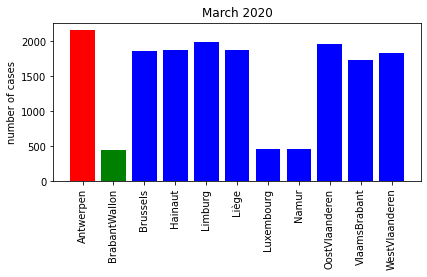

In [55]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('March 2020')
# Change the bar colors here
plt.bar(province, df_March2020['CASES'], color=['red', 'green', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue'])
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('MARCH2020.png')


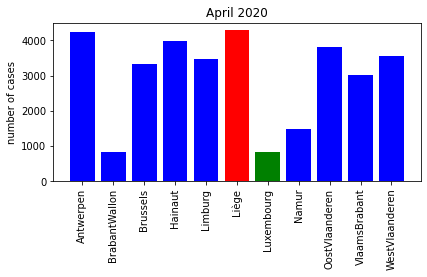

In [56]:
fig, ax = plt.subplots()
plt.bar(province, df_April2020['CASES'], color=['blue', 'blue', 'blue', 'blue', 'blue','red','green','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('April 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('APRIL2020.png')

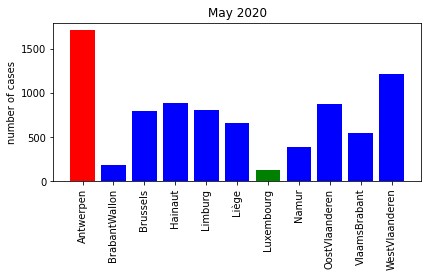

In [57]:
fig, ax = plt.subplots()
plt.bar(province,df_May2020['CASES'], color=['red', 'blue', 'blue', 'blue', 'blue','blue','green','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('May 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('May2020.png')

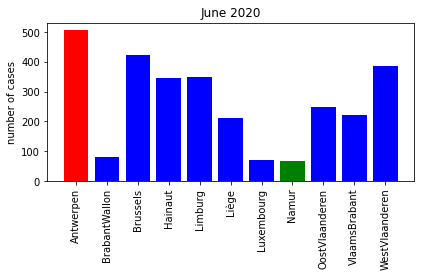

In [58]:
fig, ax = plt.subplots()
plt.bar(province,df_June2020['CASES'], color=['red', 'blue', 'blue', 'blue', 'blue','blue','blue','green','blue','blue','blue'])
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('June 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('June2020.png')

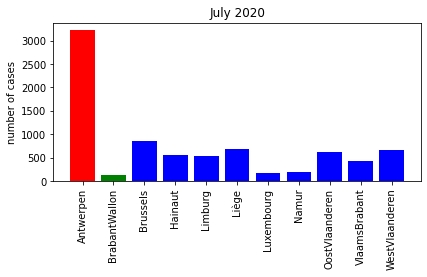

In [59]:
fig, ax = plt.subplots()
plt.bar(province,df_July2020['CASES'], color=['red', 'green', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('July 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('July2020.png')

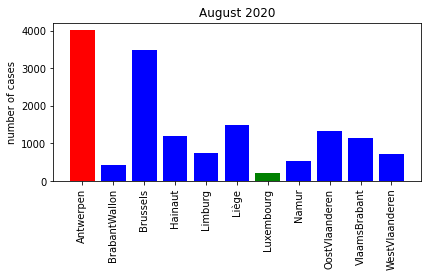

In [60]:
fig, ax = plt.subplots()
plt.bar(province,df_August2020['CASES'], color=['red', 'blue', 'blue', 'blue', 'blue','blue','green','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('August 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('August2020.png')

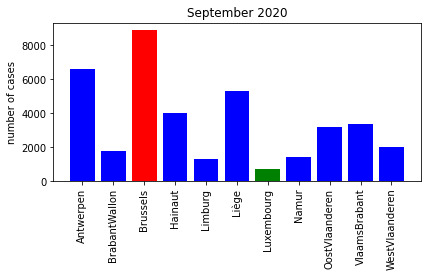

In [61]:
fig, ax = plt.subplots()
plt.bar(province,df_September2020['CASES'], color=['blue', 'blue', 'red', 'blue', 'blue','blue','green','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('September 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('September2020.png')

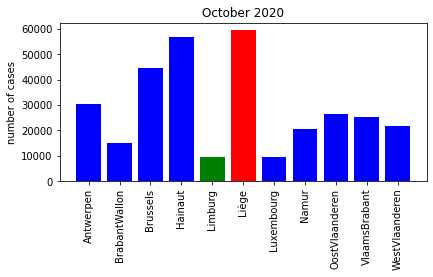

In [62]:
fig, ax = plt.subplots()
plt.bar(province,df_October2020['CASES'],color=['blue', 'blue', 'blue', 'blue', 'green','red','blue','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('October 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('October2020.png')

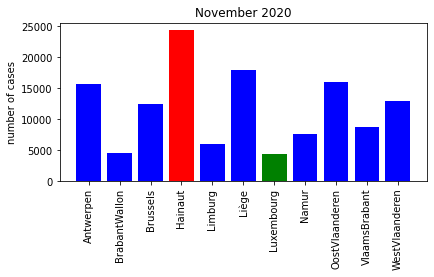

In [63]:
fig, ax = plt.subplots()
plt.bar(province,df_November2020['CASES'], color=['blue', 'blue', 'blue', 'red', 'blue','blue','green','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('November 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('November2020.png')

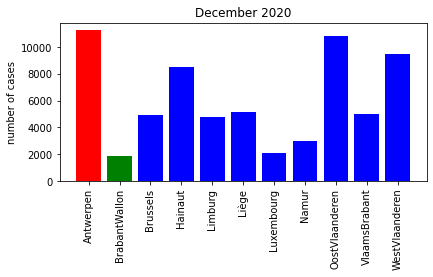

In [64]:
fig, ax = plt.subplots()
plt.bar(province,df_December2020['CASES'], color=['red', 'green', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('December 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('December2020.png')

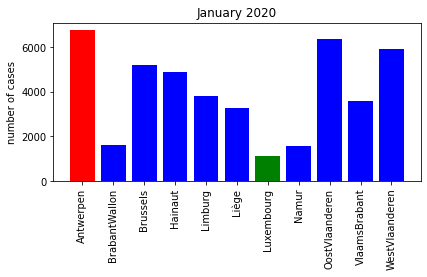

In [65]:
fig, ax = plt.subplots()
plt.bar(province,df_Janauary2021['CASES'], color=['red', 'blue', 'blue', 'blue', 'blue','blue','green','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.ylabel('number of cases')
plt.title('January 2020')
#adjust the figure margin
plt.subplots_adjust(left=0.15, bottom=0.35, right=1, top=0.9, wspace=0, hspace=0)
plt.savefig('Janauary2020.png')